## HW1_Deep_Learning

### Import Libraries

In [11]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt   
%matplotlib inline
# np.set_printoptions(suppress=True,
#    formatter={'float_kind':'{:0.2f}'.format})

### Load Dataset

In [12]:
df = pd.read_csv("hw1_dataset.csv")

### Seperating Input and Output

In [13]:
y= df['y']
df_mod= df[['x1', 'x2','x3','x4', 'x5', 'x6','x7', 'x8','x9','x10', 'x11','x12', 'x13' ]]
df_mod.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3


### Normalize dataset

In [14]:
# mean=np.mean(df_mod, axis=0)
# std_dev=np.std(df_mod, axis=0)
# df_mod=(df_mod-mean)/std_dev
# df_mod= pd.concat([df_mod, y], axis=1,)# sort=False)

In [15]:
#insert x0, whose coefficient theta0 is 1
df_mod.insert(0,"x0", 1) 
df_mod.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0,6
1,1,67,1,4,160,286,0,2,108,1,1.5,2,3,3
2,1,67,1,4,120,229,0,2,129,1,2.6,2,2,7
3,1,37,1,3,130,250,0,0,187,0,3.5,3,0,3
4,1,41,0,2,130,204,0,2,172,0,1.4,1,0,3


### Shuffle

In [16]:
# from sklearn.utils import shuffle
# df = shuffle(df)

In [17]:
# #reset index from 0 to n
# df.reset_index(drop=True)

### Splitting Dataset into 5 folds

In [18]:
# splitting df into 5 folds matrix
df1= np.matrix(df_mod.loc[0:59])
y1 = np.matrix(y.loc[0:59]).transpose()

df2= np.matrix(df_mod.loc[60:119])
y2 = np.matrix(y.loc[60:119]).transpose()

df3= np.matrix(df_mod.loc[120:179])
y3 = np.matrix(y.loc[120:179]).transpose()

df4= np.matrix(df_mod.loc[180:239])
y4 = np.matrix(y.loc[180:239]).transpose()

df5= np.matrix(df_mod.loc[240:299])
y5 = np.matrix(y.loc[240:299]).transpose()

In [19]:
#fold 1 : df_fold1= trn, df4=val, df5=test
df_fold1=np.concatenate([df1,df2,df3], axis=0)
y_fold1= np.concatenate([y1,y2,y3], axis=0)
#fold 2 : df_fold2= trn, df5=val, df1=test
df_fold2=np.concatenate([df2,df3,df4], axis=0)
y_fold2= np.concatenate([y2,y3,y4], axis=0)
#fold 3 : df_fold3= trn, df1=val, df2=test
df_fold3=np.concatenate([df3,df4,df5], axis=0)
y_fold3= np.concatenate([y3,y4,y5], axis=0)
#fold 4 : df_fold4= trn, df2=val, df3=test
df_fold4=np.concatenate([df4,df5,df1], axis=0)
y_fold4= np.concatenate([y1,y2,y3], axis=0)
#fold 5 :df_fold5= trn, df3=val, df4=test
df_fold5 =np.concatenate([df5,df1,df2], axis=0)
y_fold5 = np.concatenate([y5,y1,y2], axis=0)

In [20]:
# from sklearn.model_selection import train_test_split
# #split dataset into 80% train(240) and 20% test data(60) set
# X_train, X_test, y_train, y_test  = train_test_split(df_mod, y, test_size=.2, shuffle= False, random_state=42)
# # #further split train dataset into 80% train validation(180) and 20% cross validation(60  )
# train_valx, x_cv_test, train_valy, y_cv_test = train_test_split(X_train, y_train, test_size=0.25, shuffle= False, random_state=42)

# print('Number of datapoints in train set: ', train_valx.shape[0])
# print('Number of datapoints in validation set: ', x_cv_test.shape[0])
# print('Number of datapoints in test set: ', X_test.shape[0])
# print('Total number of datapoints:', df.shape[0])

#### Hypothesis Function for logistic regression
$$ h_\theta (x) = \frac{1}{1 + e^{-\theta^{T}x}} $$

#### Cost function:

$$ J(\theta) =  -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)} log(h_\theta (x^{(i)}))+ (1-y^{(i)})log(1-h_\theta (x^{(i)}))]$$


#### Weight update:
$$ \theta_j := \theta_j +\alpha \frac{1}{m} \sum_{i=1}^{m} (y^{(i)} - h_\theta (x^{(i)}))x^{(i)}_j  $$


### Fold1

In [21]:
#fold 1 : df_fold1= trn, df4=val, df5=tes
thetaj =np.zeros((df_fold1.shape[1],1))#(14,1)
iterations=1000
m=180
alpha= 0.00006
cntr=0
cost = np.zeros(shape=(1,iterations)) 
cost1 = np.zeros(shape=(1,iterations)) 
test_accuracy = np.zeros(shape=(1,iterations))

for i in range(iterations):
    #training
    hypothesis = 1 /(1+ np.exp(-np.dot(df_fold1,thetaj)))#(180,1)
    cost[0][i] = (-1/m) * np.sum(np.dot(y_fold1.T,np.log(hypothesis)) + np.dot((1-y_fold1).T,np.log(1-hypothesis)))
    #validation
    hypothesis1 = 1 /(1+ np.exp(-np.dot(df4,thetaj)))#(60,1) 
    cost1[0][i] = (-1/60) * np.sum(np.dot(y4.T,np.log(hypothesis1)) + np.dot((1-y4).T,np.log(1-hypothesis1)))
    #early stopping criteria:
    if (cost1[0][i]>cost[0][i]):
        cntr+=1
    if (cntr>10):
        break     
    hypothesis_test = 1.0 /(1+ np.exp(np.dot(df5,-thetaj)))
    test_accuracy[0][i]=100-(np.mean(np.abs(np.round(hypothesis_test)-y5))*100)
    #weight update
    dot=np.dot((y_fold1-hypothesis).T, df_fold1).T
    thetaj = thetaj+(alpha/m)*dot
    

# for i in range(60):
#     if hypothesis_test[i]>0.5:
#         hyp_matrix.append(1)
#     else:
#         hyp_matrix.append(0)
# len(hyp_matrix)

### Plot 1 
#### Red= Training, Blue = Validation
#### After Early stopping the accuracy will become zero as its intialized with zeros

No handles with labels found to put in legend.


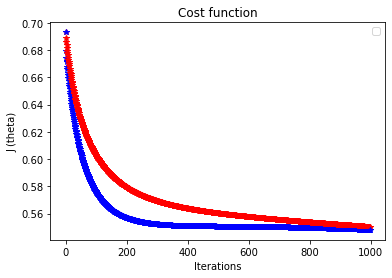

Text(0.5, 1.0, 'Accuracy')

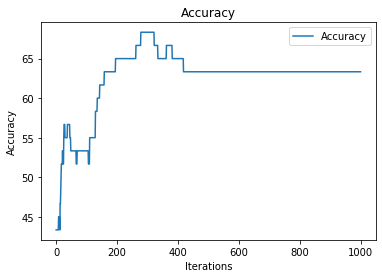

In [22]:
import pylab
x= np.linspace(0,iterations-1,iterations)
for i in range(iterations-1):
    Training=plt.plot(x[i],cost[0][i],'r*' )
    Validation= plt.plot(x[i],cost1[0][i],'b*')
plt.ylabel('J (theta)')
plt.xlabel('Iterations')
plt.title('Cost function')
plt.legend(loc= 'upper right')
pylab.show()

#Testing accuracy
plt.plot(test_accuracy.T, label= 'Accuracy')
pylab.legend()
plt.ylabel('Accuracy')
plt.xlabel('Iterations')
plt.title('Accuracy')


### Fold 2

In [23]:
#fold 2 : df_fold2= trn, df5=val, df1=test
thetaj =np.zeros((df_fold2.shape[1],1))#(14,1)
iterations=100
m=180
alpha= 0.000006
cntr=0
cost2 = np.zeros(shape=(1,iterations)) 
cost3 = np.zeros(shape=(1,iterations)) 
test_accuracy2 = np.zeros(shape=(1,iterations))

for i in range(iterations):
    #training
    hypothesis = 1 /(1+ np.exp(-np.dot(df_fold2,thetaj)))#(180,1)
    cost2[0][i] = (-1/m) * np.sum(np.dot(y_fold2.T,np.log(hypothesis)) + np.dot((1-y_fold2).T,np.log(1-hypothesis)))
    #validation
    hypothesis1 = 1 /(1+ np.exp(-np.dot(df5,thetaj)))#(60,1) 
    cost3[0][i] = (-1/60) * np.sum(np.dot(y5.T,np.log(hypothesis1)) + np.dot((1-y5).T,np.log(1-hypothesis1)))
    #early stopping criteria:
    if (cost3[0][i]>cost2[0][i]):
        cntr+=1
    if (cntr>10):
        break    
    hypothesis_test = 1.0 /(1+ np.exp(np.dot(df1,-thetaj)))
    test_accuracy2[0][i]=100-(np.mean(np.abs(np.round(hypothesis_test)-y1))*100)
    #weight update
    dot=np.dot((y_fold2-hypothesis).T, df_fold2).T
    thetaj = thetaj+(alpha/m)*dot

### Plot 2

No handles with labels found to put in legend.


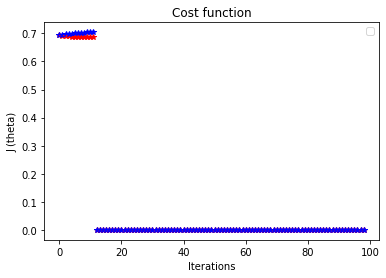

Text(0.5, 1.0, 'Accuracy')

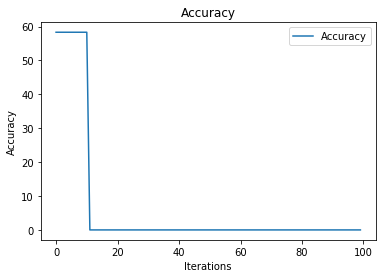

In [24]:
import pylab
x= np.linspace(0,iterations-1,iterations)
for i in range(iterations-1):
    Training=plt.plot(x[i],cost2[0][i],'r*' )
    Validation= plt.plot(x[i],cost3[0][i],'b*')
plt.ylabel('J (theta)')
plt.xlabel('Iterations')
plt.title('Cost function')
plt.legend(loc= 'upper right')
pylab.show()

#Testing accuracy
plt.plot(test_accuracy2.T, label= 'Accuracy')
pylab.legend()
plt.ylabel('Accuracy')
plt.xlabel('Iterations')
plt.title('Accuracy')


### Fold 3

In [25]:
#fold 3 : df_fold3= trn, df1=val, df2=test
thetaj =np.zeros((df_fold3.shape[1],1))#(14,1)
iterations=100
m=180
alpha= 0.00006
cntr=0
cost4 = np.zeros(shape=(1,iterations)) 
cost5 = np.zeros(shape=(1,iterations)) 
test_accuracy3 = np.zeros(shape=(1,iterations))

for i in range(iterations):
    #training
    hypothesis = 1 /(1+ np.exp(-np.dot(df_fold3,thetaj)))#(180,1)
    cost4[0][i] = (-1/m) * np.sum(np.dot(y_fold3.T,np.log(hypothesis)) + np.dot((1-y_fold3).T,np.log(1-hypothesis)))
    #validation
    hypothesis1 = 1 /(1+ np.exp(-np.dot(df1,thetaj)))#(60,1) 
    cost5[0][i] = (-1/60) * np.sum(np.dot(y1.T,np.log(hypothesis1)) + np.dot((1-y1).T,np.log(1-hypothesis1)))
    #early stopping criteria:
    if (cost5[0][i]>cost4[0][i]):
        cntr+=1
    if (cntr>10):
        break    
    hypothesis_test = 1.0 /(1+ np.exp(np.dot(df2,-thetaj)))
    test_accuracy3[0][i]=100-(np.mean(np.abs(np.round(hypothesis_test)-y2))*100)
    #weight update
    dot=np.dot((y_fold3-hypothesis).T, df_fold3).T
    thetaj = thetaj+(alpha/m)*dot

### Plot 3

No handles with labels found to put in legend.


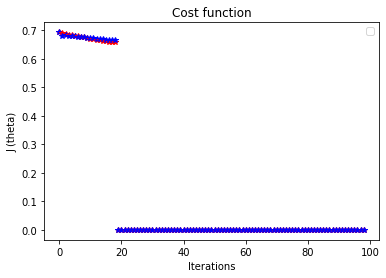

Text(0.5, 1.0, 'Accuracy')

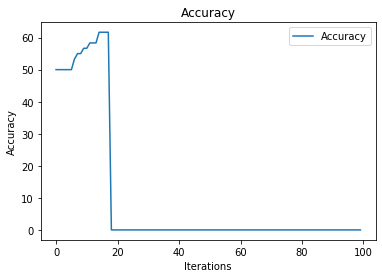

In [26]:
import pylab
x= np.linspace(0,iterations-1,iterations)
for i in range(iterations-1):
    Training=plt.plot(x[i],cost4[0][i],'r*' )
    Validation= plt.plot(x[i],cost5[0][i],'b*')
plt.ylabel('J (theta)')
plt.xlabel('Iterations')
plt.title('Cost function')
plt.legend(loc= 'upper right')
pylab.show()

#Testing accuracy
plt.plot(test_accuracy3.T, label= 'Accuracy')
pylab.legend()
plt.ylabel('Accuracy')
plt.xlabel('Iterations')
plt.title('Accuracy')


### Fold 4

In [27]:
#fold 4 : df_fold4= trn, df2=val, df3=test
thetaj =np.zeros((df_fold4.shape[1],1))#(14,1)
iterations=100
m=180
alpha= 0.00001
cntr=0
cost6 = np.zeros(shape=(1,iterations)) 
cost7 = np.zeros(shape=(1,iterations)) 
test_accuracy4 = np.zeros(shape=(1,iterations))

for i in range(iterations):
    #training
    hypothesis = 1 /(1+ np.exp(-np.dot(df_fold4,thetaj)))#(180,1)
    cost6[0][i] = (-1/m) * np.sum(np.dot(y_fold4.T,np.log(hypothesis)) + np.dot((1-y_fold4).T,np.log(1-hypothesis)))
    #validation
    hypothesis1 = 1 /(1+ np.exp(-np.dot(df2,thetaj)))#(60,1) 
    cost7[0][i] = (-1/60) * np.sum(np.dot(y2.T,np.log(hypothesis1)) + np.dot((1-y2).T,np.log(1-hypothesis1)))
    #early stopping criteria:
    if (cost7[0][i]>cost6[0][i]):
        cntr+=1
    if (cntr>10):
        break    
    hypothesis_test = 1.0 /(1+ np.exp(np.dot(df3,-thetaj)))
    test_accuracy4[0][i]=100-(np.mean(np.abs(np.round(hypothesis_test)-y3))*100)
    #weight update
    dot=np.dot((y_fold4-hypothesis).T, df_fold4).T
    thetaj = thetaj+(alpha/m)*dot


### Plot 4

No handles with labels found to put in legend.


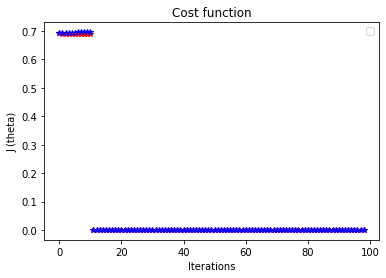

Text(0.5, 1.0, 'Accuracy')

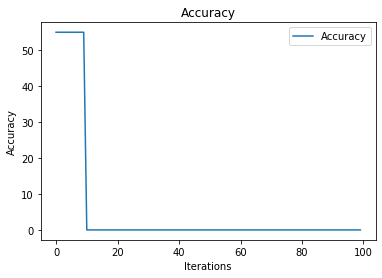

In [28]:
import pylab
x= np.linspace(0,iterations-1,iterations)
for i in range(iterations-1):
    Training=plt.plot(x[i],cost6[0][i],'r*' )
    Validation= plt.plot(x[i],cost7[0][i],'b*')
plt.ylabel('J (theta)')
plt.xlabel('Iterations')
plt.title('Cost function')
plt.legend(loc= 'upper right')
pylab.show()

#Testing accuracy
plt.plot(test_accuracy4.T, label= 'Accuracy')
pylab.legend()
plt.ylabel('Accuracy')
plt.xlabel('Iterations')
plt.title('Accuracy')


### Fold 5

In [29]:
#fold 5 :df_fold5= trn, df3=val, df4=test
thetaj =np.zeros((df_fold5.shape[1],1))#(14,1)
iterations=1000
m=180
alpha= 0.00006
cntr=0
cost8 = np.zeros(shape=(1,iterations)) 
cost9 = np.zeros(shape=(1,iterations)) 
test_accuracy5 = np.zeros(shape=(1,iterations))

for i in range(iterations):
    #training
    hypothesis = 1 /(1+ np.exp(-np.dot(df_fold5,thetaj)))#(180,1)
    cost8[0][i] = (-1/m) * np.sum(np.dot(y_fold5.T,np.log10(hypothesis)) + np.dot((1-y_fold5).T,np.log10(1-hypothesis)))
    #validation
    hypothesis1 = 1 /(1+ np.exp(-np.dot(df3,thetaj)))#(60,1) 
    cost9[0][i] = (-1/60) * np.sum(np.dot(y3.T,np.log10(hypothesis1)) + np.dot((1-y3).T,np.log10(1-hypothesis1)))
    #early stopping criteria:
    if (cost9[0][i]>cost8[0][i]):
        cntr+=1
    if (cntr>10):
        break    
    hypothesis_test = 1.0 /(1+ np.exp(np.dot(df4,-thetaj)))
    test_accuracy5[0][i]=100-(np.mean(np.abs(np.round(hypothesis_test)-y4))*100)
    #weight update
    dot=np.dot((y_fold5-hypothesis).T, df_fold5).T
    thetaj = thetaj+(alpha/m)*dot

### Plot 5

No handles with labels found to put in legend.


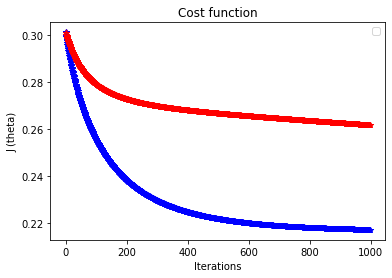

Text(0.5, 1.0, 'Accuracy')

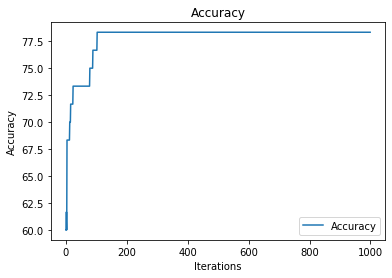

In [30]:
import pylab
x= np.linspace(0,iterations-1,iterations)
for i in range(iterations-1):
    Training=plt.plot(x[i],cost8[0][i],'r*' )
    Validation= plt.plot(x[i],cost9[0][i],'b*')
plt.ylabel('J (theta)')
plt.xlabel('Iterations')
plt.title('Cost function')
plt.legend(loc= 'upper right')
pylab.show()

#Testing accuracy
plt.plot(test_accuracy5.T, label= 'Accuracy')
pylab.legend()
plt.ylabel('Accuracy')
plt.xlabel('Iterations')
plt.title('Accuracy')


### For Second Feature set

In [31]:
y= df['y']
df_mod= df[['x1','x4', 'x5', 'x6', 'x8','x10']]
df_mod.insert(0,"x0", 1) 

In [32]:
# splitting df into 5 folds matrix
df1= np.matrix(df_mod.loc[0:59])
y1 = np.matrix(y.loc[0:59]).transpose()

df2= np.matrix(df_mod.loc[60:119])
y2 = np.matrix(y.loc[60:119]).transpose()

df3= np.matrix(df_mod.loc[120:179])
y3 = np.matrix(y.loc[120:179]).transpose()

df4= np.matrix(df_mod.loc[180:239])
y4 = np.matrix(y.loc[180:239]).transpose()

df5= np.matrix(df_mod.loc[240:299])
y5 = np.matrix(y.loc[240:299]).transpose()

#fold 1 : df_fold1= trn, df4=val, df5=test
df_fold1=np.concatenate([df1,df2,df3], axis=0)
y_fold1= np.concatenate([y1,y2,y3], axis=0)
#fold 2 : df_fold2= trn, df5=val, df1=test
df_fold2=np.concatenate([df2,df3,df4], axis=0)
y_fold2= np.concatenate([y2,y3,y4], axis=0)
#fold 3 : df_fold3= trn, df1=val, df2=test
df_fold3=np.concatenate([df3,df4,df5], axis=0)
y_fold3= np.concatenate([y3,y4,y5], axis=0)
#fold 4 : df_fold4= trn, df2=val, df3=test
df_fold4=np.concatenate([df4,df5,df1], axis=0)
y_fold4= np.concatenate([y1,y2,y3], axis=0)
#fold 5 :df_fold5= trn, df3=val, df4=test
df_fold5 =np.concatenate([df5,df1,df2], axis=0)
y_fold5 = np.concatenate([y5,y1,y2], axis=0)

### Fold1- Set2

No handles with labels found to put in legend.


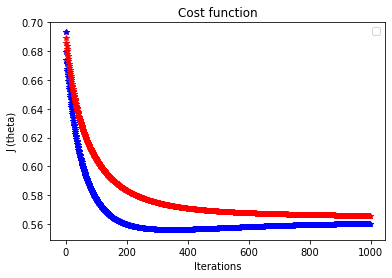

Text(0.5, 1.0, 'Accuracy')

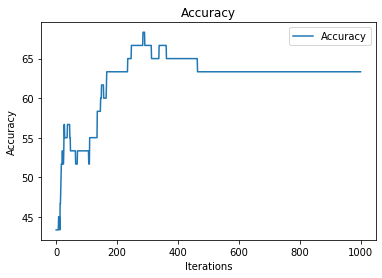

In [33]:
#fold 1 : df_fold1= trn, df4=val, df5=tes
thetaj =np.zeros((df_fold1.shape[1],1))#(14,1)
iterations=1000
m=180
alpha= 0.00006
cntr=0
cost = np.zeros(shape=(1,iterations)) 
cost1 = np.zeros(shape=(1,iterations)) 
test_accuracy = np.zeros(shape=(1,iterations))

for i in range(iterations):
    #training
    hypothesis = 1 /(1+ np.exp(-np.dot(df_fold1,thetaj)))#(180,1)
    cost[0][i] = (-1/m) * np.sum(np.dot(y_fold1.T,np.log(hypothesis)) + np.dot((1-y_fold1).T,np.log(1-hypothesis)))
    #validation
    hypothesis1 = 1 /(1+ np.exp(-np.dot(df4,thetaj)))#(60,1) 
    cost1[0][i] = (-1/60) * np.sum(np.dot(y4.T,np.log(hypothesis1)) + np.dot((1-y4).T,np.log(1-hypothesis1)))
    #early stopping criteria:
    if (cost1[0][i]>cost[0][i]):
        cntr+=1
    if (cntr>10):
        break     
    hypothesis_test = 1.0 /(1+ np.exp(np.dot(df5,-thetaj)))
    test_accuracy[0][i]=100-(np.mean(np.abs(np.round(hypothesis_test)-y5))*100)
    #weight update
    dot=np.dot((y_fold1-hypothesis).T, df_fold1).T
    thetaj = thetaj+(alpha/m)*dot
    
#plot
import pylab
x= np.linspace(0,iterations-1,iterations)
for i in range(iterations-1):
    Training=plt.plot(x[i],cost[0][i],'r*' )
    Validation= plt.plot(x[i],cost1[0][i],'b*')
plt.ylabel('J (theta)')
plt.xlabel('Iterations')
plt.title('Cost function')
plt.legend(loc= 'upper right')
pylab.show()

#Testing accuracy
plt.plot(test_accuracy.T, label= 'Accuracy')
pylab.legend()
plt.ylabel('Accuracy')
plt.xlabel('Iterations')
plt.title('Accuracy')


### Fold2- Set2

No handles with labels found to put in legend.


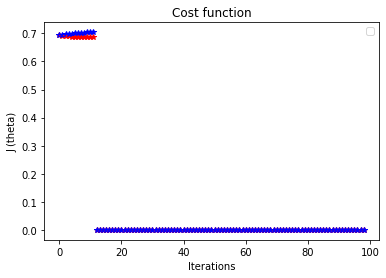

Text(0.5, 1.0, 'Accuracy')

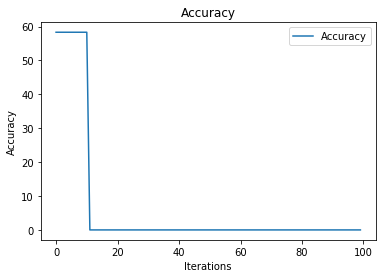

In [34]:
#fold 2 : df_fold2= trn, df5=val, df1=test
thetaj =np.zeros((df_fold2.shape[1],1))#(14,1)
iterations=100
m=180
alpha= 0.000006
cntr=0
cost2 = np.zeros(shape=(1,iterations)) 
cost3 = np.zeros(shape=(1,iterations)) 
test_accuracy2 = np.zeros(shape=(1,iterations))

for i in range(iterations):
    #training
    hypothesis = 1 /(1+ np.exp(-np.dot(df_fold2,thetaj)))#(180,1)
    cost2[0][i] = (-1/m) * np.sum(np.dot(y_fold2.T,np.log(hypothesis)) + np.dot((1-y_fold2).T,np.log(1-hypothesis)))
    #validation
    hypothesis1 = 1 /(1+ np.exp(-np.dot(df5,thetaj)))#(60,1) 
    cost3[0][i] = (-1/60) * np.sum(np.dot(y5.T,np.log(hypothesis1)) + np.dot((1-y5).T,np.log(1-hypothesis1)))
    #early stopping criteria:
    if (cost3[0][i]>cost2[0][i]):
        cntr+=1
    if (cntr>10):
        break    
    hypothesis_test = 1.0 /(1+ np.exp(np.dot(df1,-thetaj)))
    test_accuracy2[0][i]=100-(np.mean(np.abs(np.round(hypothesis_test)-y1))*100)
    #weight update
    dot=np.dot((y_fold2-hypothesis).T, df_fold2).T
    thetaj = thetaj+(alpha/m)*dot
    
#plot
import pylab
x= np.linspace(0,iterations-1,iterations)
for i in range(iterations-1):
    Training=plt.plot(x[i],cost2[0][i],'r*' )
    Validation= plt.plot(x[i],cost3[0][i],'b*')
plt.ylabel('J (theta)')
plt.xlabel('Iterations')
plt.title('Cost function')
plt.legend(loc= 'upper right')
pylab.show()

#Testing accuracy
plt.plot(test_accuracy2.T, label= 'Accuracy')
pylab.legend()
plt.ylabel('Accuracy')
plt.xlabel('Iterations')
plt.title('Accuracy')


### Fold 3- Set2

No handles with labels found to put in legend.


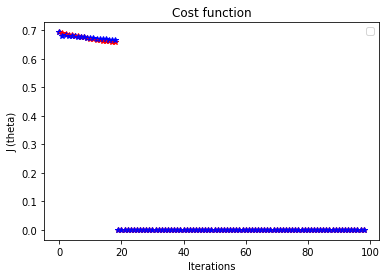

Text(0.5, 1.0, 'Accuracy')

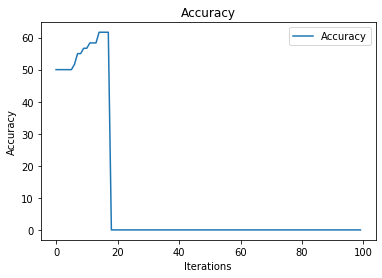

In [35]:
#fold 3 : df_fold3= trn, df1=val, df2=test
thetaj =np.zeros((df_fold3.shape[1],1))#(14,1)
iterations=100
m=180
alpha= 0.00006
cntr=0
cost4 = np.zeros(shape=(1,iterations)) 
cost5 = np.zeros(shape=(1,iterations)) 
test_accuracy3 = np.zeros(shape=(1,iterations))

for i in range(iterations):
    #training
    hypothesis = 1 /(1+ np.exp(-np.dot(df_fold3,thetaj)))#(180,1)
    cost4[0][i] = (-1/m) * np.sum(np.dot(y_fold3.T,np.log(hypothesis)) + np.dot((1-y_fold3).T,np.log(1-hypothesis)))
    #validation
    hypothesis1 = 1 /(1+ np.exp(-np.dot(df1,thetaj)))#(60,1) 
    cost5[0][i] = (-1/60) * np.sum(np.dot(y1.T,np.log(hypothesis1)) + np.dot((1-y1).T,np.log(1-hypothesis1)))
    #early stopping criteria:
    if (cost5[0][i]>cost4[0][i]):
        cntr+=1
    if (cntr>10):
        break    
    hypothesis_test = 1.0 /(1+ np.exp(np.dot(df2,-thetaj)))
    test_accuracy3[0][i]=100-(np.mean(np.abs(np.round(hypothesis_test)-y2))*100)
    #weight update
    dot=np.dot((y_fold3-hypothesis).T, df_fold3).T
    thetaj = thetaj+(alpha/m)*dot
    
#plot
import pylab
x= np.linspace(0,iterations-1,iterations)
for i in range(iterations-1):
    Training=plt.plot(x[i],cost4[0][i],'r*' )
    Validation= plt.plot(x[i],cost5[0][i],'b*')
plt.ylabel('J (theta)')
plt.xlabel('Iterations')
plt.title('Cost function')
plt.legend(loc= 'upper right')
pylab.show()

#Testing accuracy
plt.plot(test_accuracy3.T, label= 'Accuracy')
pylab.legend()
plt.ylabel('Accuracy')
plt.xlabel('Iterations')
plt.title('Accuracy')



### Fold 4- Set2

No handles with labels found to put in legend.


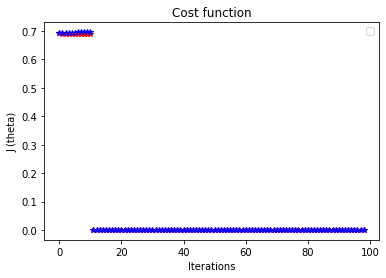

Text(0.5, 1.0, 'Accuracy')

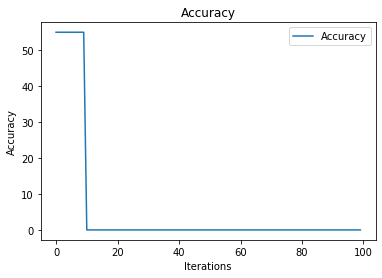

In [36]:
#fold 4 : df_fold4= trn, df2=val, df3=test
thetaj =np.zeros((df_fold4.shape[1],1))#(14,1)
iterations=100
m=180
alpha= 0.00001
cntr=0
cost6 = np.zeros(shape=(1,iterations)) 
cost7 = np.zeros(shape=(1,iterations)) 
test_accuracy4 = np.zeros(shape=(1,iterations))

for i in range(iterations):
    #training
    hypothesis = 1 /(1+ np.exp(-np.dot(df_fold4,thetaj)))#(180,1)
    cost6[0][i] = (-1/m) * np.sum(np.dot(y_fold4.T,np.log(hypothesis)) + np.dot((1-y_fold4).T,np.log(1-hypothesis)))
    #validation
    hypothesis1 = 1 /(1+ np.exp(-np.dot(df2,thetaj)))#(60,1) 
    cost7[0][i] = (-1/60) * np.sum(np.dot(y2.T,np.log(hypothesis1)) + np.dot((1-y2).T,np.log(1-hypothesis1)))
    #early stopping criteria:
    if (cost7[0][i]>cost6[0][i]):
        cntr+=1
    if (cntr>10):
        break    
    hypothesis_test = 1.0 /(1+ np.exp(np.dot(df3,-thetaj)))
    test_accuracy4[0][i]=100-(np.mean(np.abs(np.round(hypothesis_test)-y3))*100)
    #weight update
    dot=np.dot((y_fold4-hypothesis).T, df_fold4).T
    thetaj = thetaj+(alpha/m)*dot

#plot
import pylab
x= np.linspace(0,iterations-1,iterations)
for i in range(iterations-1):
    Training=plt.plot(x[i],cost6[0][i],'r*' )
    Validation= plt.plot(x[i],cost7[0][i],'b*')
plt.ylabel('J (theta)')
plt.xlabel('Iterations')
plt.title('Cost function')
plt.legend(loc= 'upper right')
pylab.show()

#Testing accuracy
plt.plot(test_accuracy4.T, label= 'Accuracy')
pylab.legend()
plt.ylabel('Accuracy')
plt.xlabel('Iterations')
plt.title('Accuracy')


### Fold 5- Set2

No handles with labels found to put in legend.


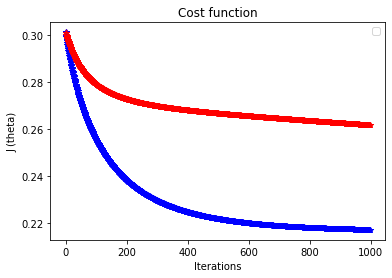

Text(0.5, 1.0, 'Accuracy')

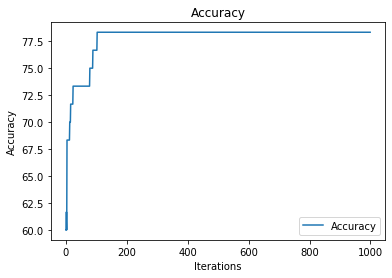

In [34]:
#fold 5 :df_fold5= trn, df3=val, df4=test
thetaj =np.zeros((df_fold5.shape[1],1))#(14,1)
iterations=1000
m=180
alpha= 0.00006
cntr=0
cost8 = np.zeros(shape=(1,iterations)) 
cost9 = np.zeros(shape=(1,iterations)) 
test_accuracy5 = np.zeros(shape=(1,iterations))

for i in range(iterations):
    #training
    hypothesis = 1 /(1+ np.exp(-np.dot(df_fold5,thetaj)))#(180,1)
    cost8[0][i] = (-1/m) * np.sum(np.dot(y_fold5.T,np.log10(hypothesis)) + np.dot((1-y_fold5).T,np.log10(1-hypothesis)))
    #validation
    hypothesis1 = 1 /(1+ np.exp(-np.dot(df3,thetaj)))#(60,1) 
    cost9[0][i] = (-1/60) * np.sum(np.dot(y3.T,np.log10(hypothesis1)) + np.dot((1-y3).T,np.log10(1-hypothesis1)))
    #early stopping criteria:
    if (cost9[0][i]>cost8[0][i]):
        cntr+=1
    if (cntr>10):
        break    
    hypothesis_test = 1.0 /(1+ np.exp(np.dot(df4,-thetaj)))
    test_accuracy5[0][i]=100-(np.mean(np.abs(np.round(hypothesis_test)-y4))*100)
    #weight update
    dot=np.dot((y_fold5-hypothesis).T, df_fold5).T
    thetaj = thetaj+(alpha/m)*dot
#plot
import pylab
x= np.linspace(0,iterations-1,iterations)
for i in range(iterations-1):
    Training=plt.plot(x[i],cost8[0][i],'r*' )
    Validation= plt.plot(x[i],cost9[0][i],'b*')
plt.ylabel('J (theta)')
plt.xlabel('Iterations')
plt.title('Cost function')
plt.legend(loc= 'upper right')
pylab.show()

#Testing accuracy
plt.plot(test_accuracy5.T, label= 'Accuracy')
pylab.legend()
plt.ylabel('Accuracy')
plt.xlabel('Iterations')
plt.title('Accuracy')


### For 3rd feature set 

In [41]:
y= df['y']
df_mod= df[['x2', 'x6', 'x7', 'x9','x11','x12', 'x13']]
df_mod.insert(0,"x0", 1) 

In [42]:
# splitting df into 5 folds matrix
df1= np.matrix(df_mod.loc[0:59])
y1 = np.matrix(y.loc[0:59]).transpose()

df2= np.matrix(df_mod.loc[60:119])
y2 = np.matrix(y.loc[60:119]).transpose()

df3= np.matrix(df_mod.loc[120:179])
y3 = np.matrix(y.loc[120:179]).transpose()

df4= np.matrix(df_mod.loc[180:239])
y4 = np.matrix(y.loc[180:239]).transpose()

df5= np.matrix(df_mod.loc[240:299])
y5 = np.matrix(y.loc[240:299]).transpose()

#fold 1 : df_fold1= trn, df4=val, df5=test
df_fold1=np.concatenate([df1,df2,df3], axis=0)
y_fold1= np.concatenate([y1,y2,y3], axis=0)
#fold 2 : df_fold2= trn, df5=val, df1=test
df_fold2=np.concatenate([df2,df3,df4], axis=0)
y_fold2= np.concatenate([y2,y3,y4], axis=0)
#fold 3 : df_fold3= trn, df1=val, df2=test
df_fold3=np.concatenate([df3,df4,df5], axis=0)
y_fold3= np.concatenate([y3,y4,y5], axis=0)
#fold 4 : df_fold4= trn, df2=val, df3=test
df_fold4=np.concatenate([df4,df5,df1], axis=0)
y_fold4= np.concatenate([y1,y2,y3], axis=0)
#fold 5 :df_fold5= trn, df3=val, df4=test
df_fold5 =np.concatenate([df5,df1,df2], axis=0)
y_fold5 = np.concatenate([y5,y1,y2], axis=0)

### Fold 1- Set3

No handles with labels found to put in legend.


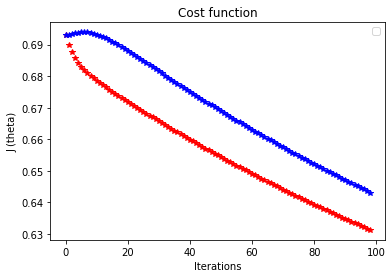

Text(0.5, 1.0, 'Accuracy')

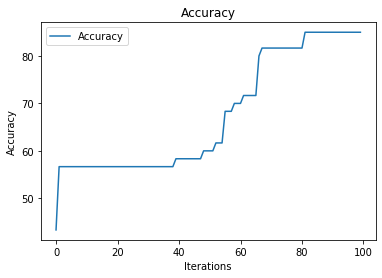

In [53]:
#fold 1 : df_fold1= trn, df4=val, df5=tes
thetaj =np.zeros((df_fold1.shape[1],1))#(14,1)
iterations=100
m=180
alpha= 0.02
cntr=0
cost = np.zeros(shape=(1,iterations)) 
cost1 = np.zeros(shape=(1,iterations)) 
test_accuracy = np.zeros(shape=(1,iterations))

for i in range(iterations):
    #training
    hypothesis = 1 /(1+ np.exp(-np.dot(df_fold1,thetaj)))#(180,1)
    cost[0][i] = (-1/m) * np.sum(np.dot(y_fold1.T,np.log(hypothesis)) + np.dot((1-y_fold1).T,np.log(1-hypothesis)))
    #validation
    hypothesis1 = 1 /(1+ np.exp(-np.dot(df4,thetaj)))#(60,1) 
    cost1[0][i] = (-1/60) * np.sum(np.dot(y4.T,np.log(hypothesis1)) + np.dot((1-y4).T,np.log(1-hypothesis1)))
    #early stopping criteria:
#     if (cost1[0][i]>cost[0][i]):
#         cntr+=1
#     if (cntr>10):
#         break     
    hypothesis_test = 1.0 /(1+ np.exp(np.dot(df5,-thetaj)))
    test_accuracy[0][i]=100-(np.mean(np.abs(np.round(hypothesis_test)-y5))*100)
    #weight update
    dot=np.dot((y_fold1-hypothesis).T, df_fold1).T
    thetaj = thetaj+(alpha/m)*dot
    
#plot
import pylab
x= np.linspace(0,iterations-1,iterations)
for i in range(iterations-1):
    Training=plt.plot(x[i],cost[0][i],'r*' )
    Validation= plt.plot(x[i],cost1[0][i],'b*')
plt.ylabel('J (theta)')
plt.xlabel('Iterations')
plt.title('Cost function')
plt.legend(loc= 'upper right')
pylab.show()

#Testing accuracy
plt.plot(test_accuracy.T, label= 'Accuracy')
pylab.legend()
plt.ylabel('Accuracy')
plt.xlabel('Iterations')
plt.title('Accuracy')



### Fold 2- Set3

No handles with labels found to put in legend.


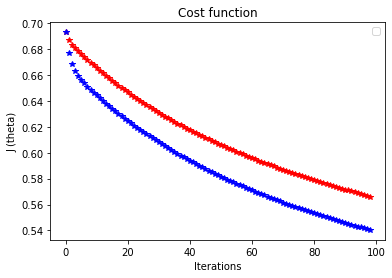

Text(0.5, 1.0, 'Accuracy')

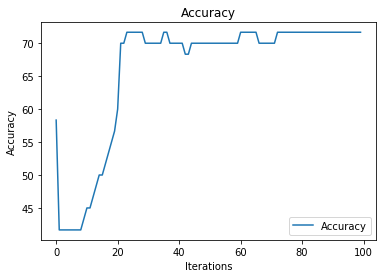

In [56]:
#fold 2 : df_fold2= trn, df5=val, df1=test
thetaj =np.zeros((df_fold2.shape[1],1))#(14,1)
iterations=100
m=180
alpha= .06
cntr=0
cost2 = np.zeros(shape=(1,iterations)) 
cost3 = np.zeros(shape=(1,iterations)) 
test_accuracy2 = np.zeros(shape=(1,iterations))

for i in range(iterations):
    #training
    hypothesis = 1 /(1+ np.exp(-np.dot(df_fold2,thetaj)))#(180,1)
    cost2[0][i] = (-1/m) * np.sum(np.dot(y_fold2.T,np.log(hypothesis)) + np.dot((1-y_fold2).T,np.log(1-hypothesis)))
    #validation
    hypothesis1 = 1 /(1+ np.exp(-np.dot(df5,thetaj)))#(60,1) 
    cost3[0][i] = (-1/60) * np.sum(np.dot(y5.T,np.log(hypothesis1)) + np.dot((1-y5).T,np.log(1-hypothesis1)))
    #early stopping criteria:
    if (cost3[0][i]>cost2[0][i]):
        cntr+=1
    if (cntr>10):
        break    
    hypothesis_test = 1.0 /(1+ np.exp(np.dot(df1,-thetaj)))
    test_accuracy2[0][i]=100-(np.mean(np.abs(np.round(hypothesis_test)-y1))*100)
    #weight update
    dot=np.dot((y_fold2-hypothesis).T, df_fold2).T
    thetaj = thetaj+(alpha/m)*dot
    
##Plot
import pylab
x= np.linspace(0,iterations-1,iterations)
for i in range(iterations-1):
    Training=plt.plot(x[i],cost2[0][i],'r*' )
    Validation= plt.plot(x[i],cost3[0][i],'b*')
plt.ylabel('J (theta)')
plt.xlabel('Iterations')
plt.title('Cost function')
plt.legend(loc= 'upper right')
pylab.show()

#Testing accuracy
plt.plot(test_accuracy2.T, label= 'Accuracy')
pylab.legend(loc=0)
plt.ylabel('Accuracy')
plt.xlabel('Iterations')
plt.title('Accuracy')


### Fold 3- Set3

No handles with labels found to put in legend.


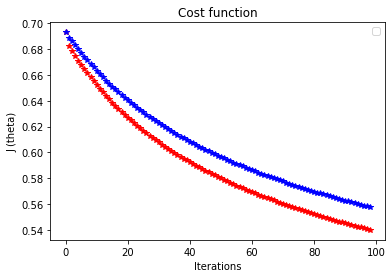

Text(0.5, 1.0, 'Accuracy')

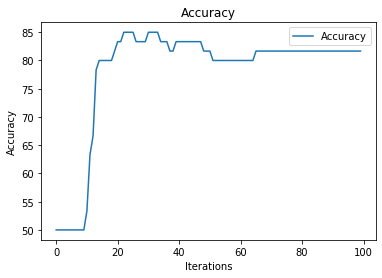

In [57]:
#fold 3 : df_fold3= trn, df1=val, df2=test
thetaj =np.zeros((df_fold3.shape[1],1))#(14,1)
iterations=100
m=180
alpha= .1
cntr=0
cost4 = np.zeros(shape=(1,iterations)) 
cost5 = np.zeros(shape=(1,iterations)) 
test_accuracy3 = np.zeros(shape=(1,iterations))

for i in range(iterations):
    #training
    hypothesis = 1 /(1+ np.exp(-np.dot(df_fold3,thetaj)))#(180,1)
    cost4[0][i] = (-1/m) * np.sum(np.dot(y_fold3.T,np.log(hypothesis)) + np.dot((1-y_fold3).T,np.log(1-hypothesis)))
    #validation
    hypothesis1 = 1 /(1+ np.exp(-np.dot(df1,thetaj)))#(60,1) 
    cost5[0][i] = (-1/60) * np.sum(np.dot(y1.T,np.log(hypothesis1)) + np.dot((1-y1).T,np.log(1-hypothesis1)))
    #early stopping criteria:
#     if (cost5[0][i]>cost4[0][i]):
#         cntr+=1
#     if (cntr>10):
#         break    
    hypothesis_test = 1.0 /(1+ np.exp(np.dot(df2,-thetaj)))
    test_accuracy3[0][i]=100-(np.mean(np.abs(np.round(hypothesis_test)-y2))*100)
    #weight update
    dot=np.dot((y_fold3-hypothesis).T, df_fold3).T
    thetaj = thetaj+(alpha/m)*dot
    
#Plot 
import pylab
x= np.linspace(0,iterations-1,iterations)
for i in range(iterations-1):
    Training=plt.plot(x[i],cost4[0][i],'r*' )
    Validation= plt.plot(x[i],cost5[0][i],'b*')
plt.ylabel('J (theta)')
plt.xlabel('Iterations')
plt.title('Cost function')
plt.legend(loc= 'upper right')
pylab.show()

#Testing accuracy
plt.plot(test_accuracy3.T, label= 'Accuracy')
pylab.legend(loc=0)
plt.ylabel('Accuracy')
plt.xlabel('Iterations')
plt.title('Accuracy')


### Fold 4- Set3

No handles with labels found to put in legend.


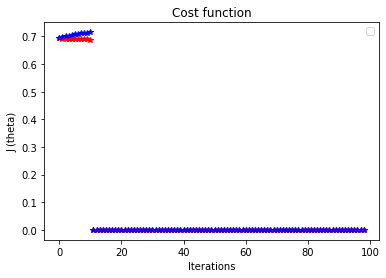

Text(0.5, 1.0, 'Accuracy')

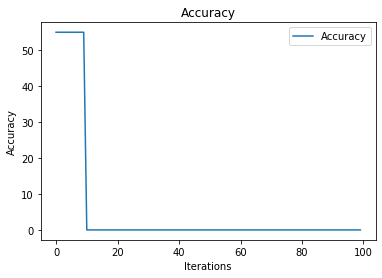

In [65]:
#fold 4 : df_fold4= trn, df2=val, df3=test
thetaj =np.zeros((df_fold4.shape[1],1))#(14,1)
iterations=100
m=180
alpha= 0.02
cntr=0
cost6 = np.zeros(shape=(1,iterations)) 
cost7 = np.zeros(shape=(1,iterations)) 
test_accuracy4 = np.zeros(shape=(1,iterations))

for i in range(iterations):
    #training
    hypothesis = 1 /(1+ np.exp(-np.dot(df_fold4,thetaj)))#(180,1)
    cost6[0][i] = (-1/m) * np.sum(np.dot(y_fold4.T,np.log(hypothesis)) + np.dot((1-y_fold4).T,np.log(1-hypothesis)))
    #validation
    hypothesis1 = 1 /(1+ np.exp(-np.dot(df2,thetaj)))#(60,1) 
    cost7[0][i] = (-1/60) * np.sum(np.dot(y2.T,np.log(hypothesis1)) + np.dot((1-y2).T,np.log(1-hypothesis1)))
    #early stopping criteria:
    if (cost7[0][i]>cost6[0][i]):
        cntr+=1
    if (cntr>10):
        break    
    hypothesis_test = 1.0 /(1+ np.exp(np.dot(df3,-thetaj)))
    test_accuracy4[0][i]=100-(np.mean(np.abs(np.round(hypothesis_test)-y3))*100)
    #weight update
    dot=np.dot((y_fold4-hypothesis).T, df_fold4).T
    thetaj = thetaj+(alpha/m)*dot

#Plot
import pylab
x= np.linspace(0,iterations-1,iterations)
for i in range(iterations-1):
    Training=plt.plot(x[i],cost6[0][i],'r*' )
    Validation= plt.plot(x[i],cost7[0][i],'b*')
plt.ylabel('J (theta)')
plt.xlabel('Iterations')
plt.title('Cost function')
plt.legend(loc= 'upper right')
pylab.show()

#Testing accuracy
plt.plot(test_accuracy4.T, label= 'Accuracy')
pylab.legend(loc=0)
plt.ylabel('Accuracy')
plt.xlabel('Iterations')
plt.title('Accuracy')

### Fold 5- Set3

No handles with labels found to put in legend.


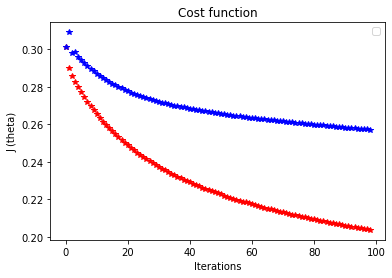

Text(0.5, 1.0, 'Accuracy')

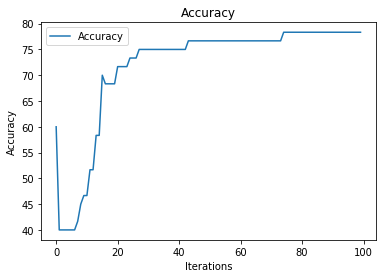

In [74]:
#fold 5 :df_fold5= trn, df3=val, df4=test
thetaj =np.zeros((df_fold5.shape[1],1))#(14,1)
iterations=100
m=180
alpha= .18
cntr=0
cost8 = np.zeros(shape=(1,iterations)) 
cost9 = np.zeros(shape=(1,iterations)) 
test_accuracy5 = np.zeros(shape=(1,iterations))

for i in range(iterations):
    #training
    hypothesis = 1 /(1+ np.exp(-np.dot(df_fold5,thetaj)))#(180,1)
    cost8[0][i] = (-1/m) * np.sum(np.dot(y_fold5.T,np.log10(hypothesis)) + np.dot((1-y_fold5).T,np.log10(1-hypothesis)))
    #validation
    hypothesis1 = 1 /(1+ np.exp(-np.dot(df3,thetaj)))#(60,1) 
    cost9[0][i] = (-1/60) * np.sum(np.dot(y3.T,np.log10(hypothesis1)) + np.dot((1-y3).T,np.log10(1-hypothesis1)))
    #early stopping criteria:  
    hypothesis_test = 1.0 /(1+ np.exp(np.dot(df4,-thetaj)))
    test_accuracy5[0][i]=100-(np.mean(np.abs(np.round(hypothesis_test)-y4))*100)
    #weight update
    dot=np.dot((y_fold5-hypothesis).T, df_fold5).T
    thetaj = thetaj+(alpha/m)*dot
#Plot
import pylab
x= np.linspace(0,iterations-1,iterations)
for i in range(iterations-1):
    Training=plt.plot(x[i],cost8[0][i],'r*' )
    Validation= plt.plot(x[i],cost9[0][i],'b*')
plt.ylabel('J (theta)')
plt.xlabel('Iterations')
plt.title('Cost function')
plt.legend(loc= 'upper right')
pylab.show()

#Testing accuracy
plt.plot(test_accuracy5.T, label= 'Accuracy')
pylab.legend(loc=0)
plt.ylabel('Accuracy')
plt.xlabel('Iterations')
plt.title('Accuracy')